# Data Analysis and Visualization


In [1]:
import category_encoders as ce
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
# load .env 
load_dotenv()

# Get the dataframe from the excel file
file_path = os.getenv('DATA_PATH')
df = pd.read_excel(file_path, sheet_name='query_result')
df.head()
df_copy= df.copy()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   appointmentID           379 non-null    int64  
 1   appointment_status      379 non-null    object 
 2   distance_to_company     379 non-null    object 
 3   application_count       379 non-null    int64  
 4   seen_application_count  379 non-null    object 
 5   applicationSL_count     379 non-null    int64  
 6   message_count           379 non-null    object 
 7   appointment_count       379 non-null    int64  
 8   appointment_came_count  379 non-null    int64  
 9   appointment_delay       379 non-null    int64  
 10  education_status        375 non-null    object 
 11  experience_month        319 non-null    float64
 12  age                     378 non-null    float64
 13  gender                  378 non-null    object 
 14  work_time_preference    371 non-null    ob

## Missing Values Analysis and Handling


In [4]:
random_rows = df.sample(n=8)
print(random_rows)


     appointmentID   appointment_status distance_to_company  \
174        2503548  worker_did_not_came                1.45   
152        2436311  worker_did_not_came                8.96   
305        2495447  worker_did_not_came                2.32   
104        2431522  worker_did_not_came                 8.8   
52         2455325  worker_did_not_came                4.12   
9          2017365          worker_came                1.03   
322        2533194  worker_did_not_came                8.28   
242        2499417  worker_did_not_came                 4.5   

     application_count seen_application_count  applicationSL_count  \
174                 28                     12                   10   
152                 29                     16                    8   
305                  6                      5                    2   
104                  5                      2                    3   
52                  43                     19                   10   
9           

In [5]:
# Calculate null value counts and percentages
null_counts = df.isnull().sum()
null_percentages = (null_counts / len(df)) * 100

# Create a combined table for null values
null_info = pd.DataFrame({
    'Null Count': null_counts,
    'Null Percentage': null_percentages
})

In [6]:
null_info

,Null Count,Null Percentage
appointmentID,0,0.000000
appointment_status,0,0.000000
distance_to_company,0,0.000000
application_count,0,0.000000
seen_application_count,0,0.000000
applicationSL_count,0,0.000000
message_count,0,0.000000
appointment_count,0,0.000000
appointment_came_count,0,0.000000
appointment_delay,0,0.000000


In [7]:
# Fill missing values in 'education_status' with the mode
df['education_status'] = df['education_status'].fillna(df['education_status'].mode()[0])

# Fill missing values in 'experience_month' with the median
df['experience_month'] = df['experience_month'].fillna(df['experience_month'].median())

# Fill missing values in 'age' with the mean
df['age'] = df['age'].fillna(df['age'].mean())

# Fill missing values in 'gender' with the mode
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])

# Fill missing values in 'work_time_preference' with the mode
df['work_time_preference'] = df['work_time_preference'].fillna(df['work_time_preference'].mode()[0])

# Check for remaining missing values
null_counts_after = df.isnull().sum()


In [8]:
def convert_float_to_int(df):
    for col in df.columns:
        if df[col].dtype == 'float64':
           
            if (df[col] % 1 == 0).all():
                df[col] = df[col].astype('int64')
    return df

df = convert_float_to_int(df)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   appointmentID           379 non-null    int64  
 1   appointment_status      379 non-null    object 
 2   distance_to_company     379 non-null    object 
 3   application_count       379 non-null    int64  
 4   seen_application_count  379 non-null    object 
 5   applicationSL_count     379 non-null    int64  
 6   message_count           379 non-null    object 
 7   appointment_count       379 non-null    int64  
 8   appointment_came_count  379 non-null    int64  
 9   appointment_delay       379 non-null    int64  
 10  education_status        379 non-null    object 
 11  experience_month        379 non-null    int64  
 12  age                     379 non-null    float64
 13  gender                  379 non-null    object 
 14  work_time_preference    379 non-null    ob

## Data Cleaning


In [10]:
# Replace 'na' values with NaN
df = df.replace(to_replace='na', value=np.nan)

# Convert columns with 'na' values to numeric
columns_with_na = df.columns[df.isin(['na']).any()]
for column in columns_with_na:
    df[column] = pd.to_numeric(df[column], errors='coerce')


C:\Users\emreb\AppData\Local\Temp\ipykernel_1588\3003504848.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(to_replace='na', value=np.nan)


In [11]:
df.loc[27]

appointmentID                         2342511
appointment_status        worker_did_not_came
distance_to_company                       NaN
application_count                           5
seen_application_count                    1.0
applicationSL_count                         1
message_count                             5.0
appointment_count                           1
appointment_came_count                      0
appointment_delay                           4
education_status                middle_school
experience_month                           24
age                                      18.0
gender                                   male
work_time_preference                full_time
profile_fill_rate                          83
has_used_search                             0
Name: 27, dtype: object

In [12]:
# Drop rows with NaN values
df = df.dropna()

In [13]:
null_counts_after

appointmentID             0
appointment_status        0
distance_to_company       0
application_count         0
seen_application_count    0
applicationSL_count       0
message_count             0
appointment_count         0
appointment_came_count    0
appointment_delay         0
education_status          0
experience_month          0
age                       0
gender                    0
work_time_preference      0
profile_fill_rate         0
has_used_search           0
dtype: int64

In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 375 entries, 0 to 378
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   appointmentID           375 non-null    int64  
 1   appointment_status      375 non-null    object 
 2   distance_to_company     375 non-null    float64
 3   application_count       375 non-null    int64  
 4   seen_application_count  375 non-null    float64
 5   applicationSL_count     375 non-null    int64  
 6   message_count           375 non-null    float64
 7   appointment_count       375 non-null    int64  
 8   appointment_came_count  375 non-null    int64  
 9   appointment_delay       375 non-null    int64  
 10  education_status        375 non-null    object 
 11  experience_month        375 non-null    int64  
 12  age                     375 non-null    float64
 13  gender                  375 non-null    object 
 14  work_time_preference    375 non-null    object 

## Encoding Categorical Variables


In [15]:
categorical_cols = df.select_dtypes(include=['object']).columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

In [17]:
# Label Encoding for work_time_preference and ordinal encoding for education_status
label_encoder = LabelEncoder()


encoder= ce.OrdinalEncoder(cols=['education_status'],return_df=True,
                           mapping=[{'col':'education_status','mapping':{'elementary_school':1,'middle_school':2,'high_school':3,'university':4}}])

df["education_status"] = encoder.fit_transform(df["education_status"])


df['work_time_preference'] = label_encoder.fit_transform(df['work_time_preference'].astype(str))

# Binary encoding for appointment_status and gender
df['appointment_status'] = df['appointment_status'].apply(lambda x: 1 if x == 'worker_came' else 0)
df['gender'] = df['gender'].map({'male': 0, 'female': 1})


In [18]:
df.head()

,appointmentID,appointment_status,distance_to_company,application_count,seen_application_count,applicationSL_count,message_count,appointment_count,appointment_came_count,appointment_delay,education_status,experience_month,age,gender,work_time_preference,profile_fill_rate,has_used_search
0,1664932,1,2.20,28,26.0,16,30.0,2,1,1,4,10,23.0,0,0,95,0
1,1664850,0,2.28,45,38.0,18,47.0,1,0,1,3,12,24.0,1,0,83,1
2,1665031,1,9.58,21,10.0,4,20.0,2,1,2,1,96,41.0,1,0,89,1
3,1769217,0,1.14,15,11.0,3,17.0,1,0,1,4,12,22.0,1,1,83,1
4,1871983,1,7.63,44,24.0,8,40.0,2,1,1,3,103,28.0,1,0,71,1


## Correlation Analysis


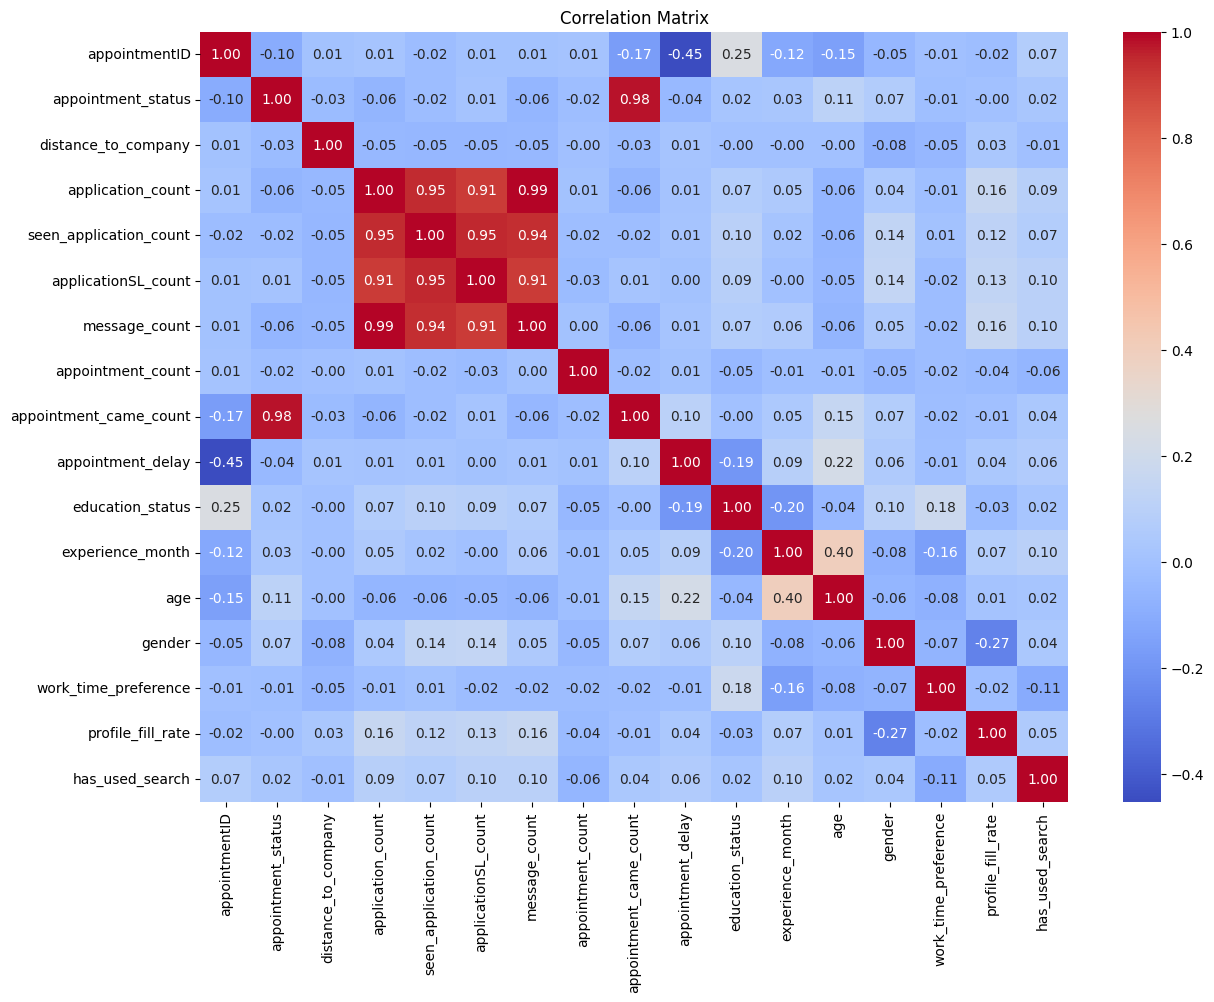

In [19]:

correlation_matrix = df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


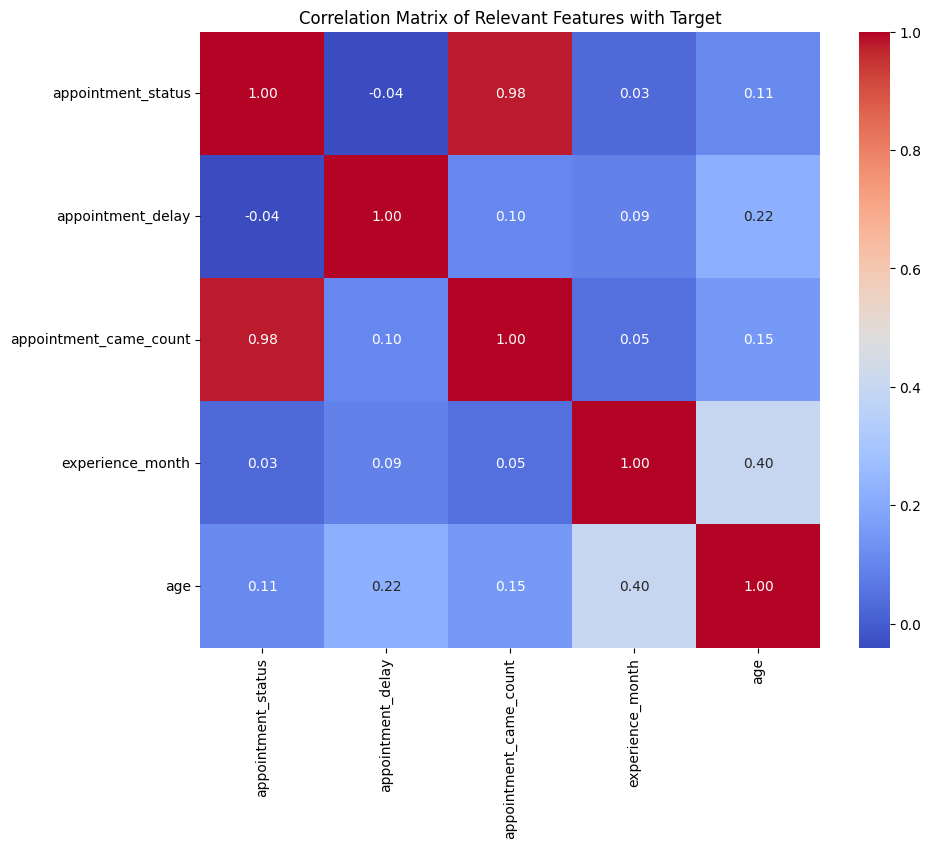

In [47]:
# Select relevant columns for further analysis
relevant_columns = ['appointment_status', 'appointment_delay', 'appointment_came_count', 'experience_month', 'age']

subset_df = df[relevant_columns]
correlation_matrix_subset = subset_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_subset, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Relevant Features with Target')
plt.show()

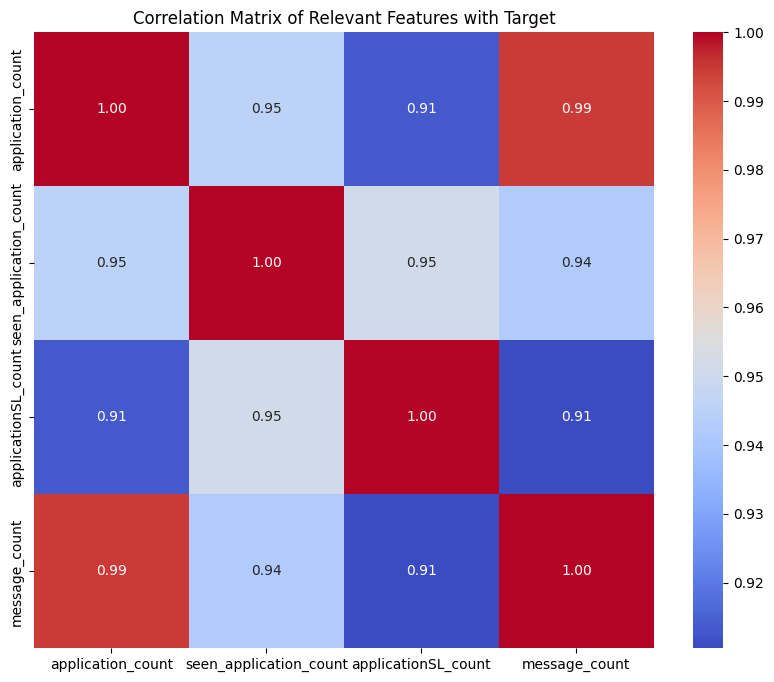

In [52]:
# Additional correlation analysis for application-related columns
relevant_columns_each = ['application_count', 'seen_application_count', 'applicationSL_count', 'message_count']

subset_df_each = df[relevant_columns_each]
correlation_matrix_subset_each = subset_df_each.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_subset_each, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Relevant Features with Target')
plt.show()

## Data Visualization


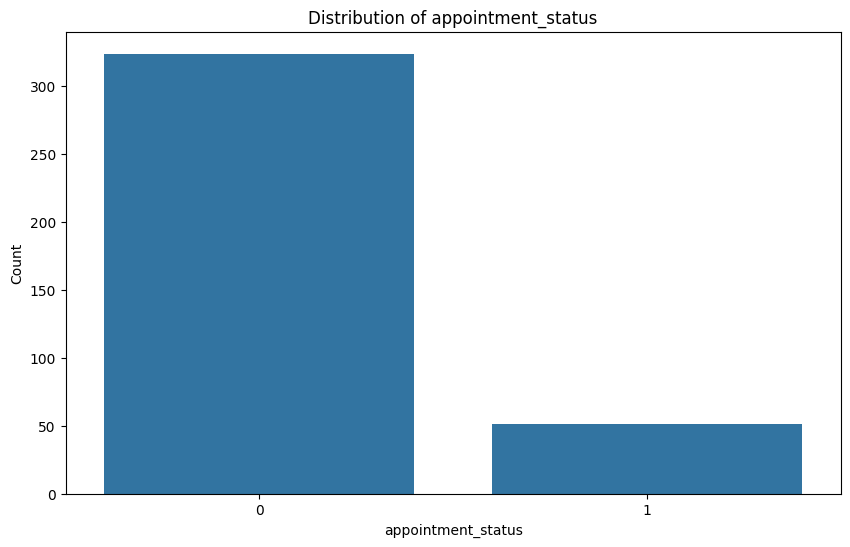

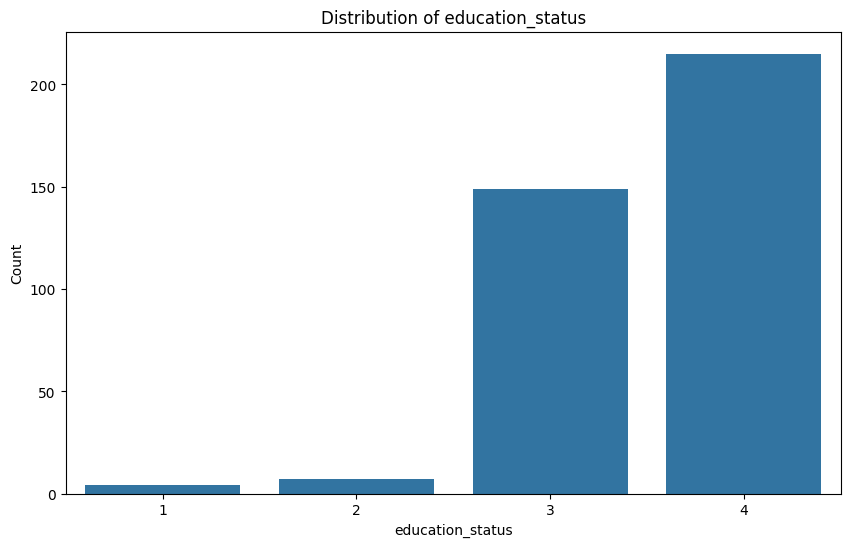

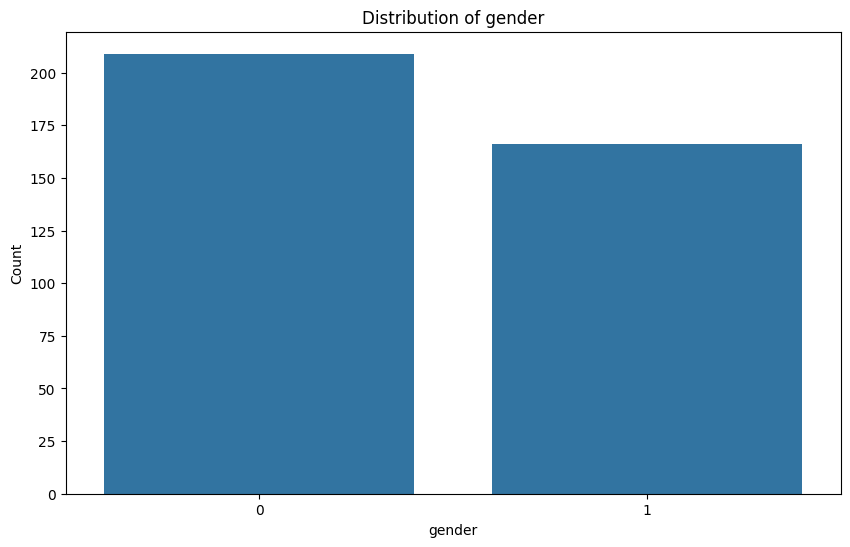

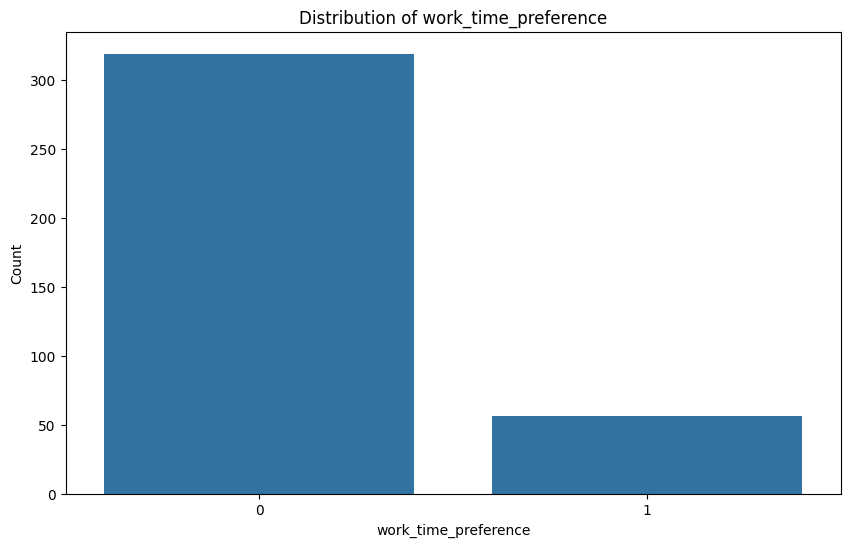

In [20]:
# Visualize the distribution of categorical variables
for column in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()


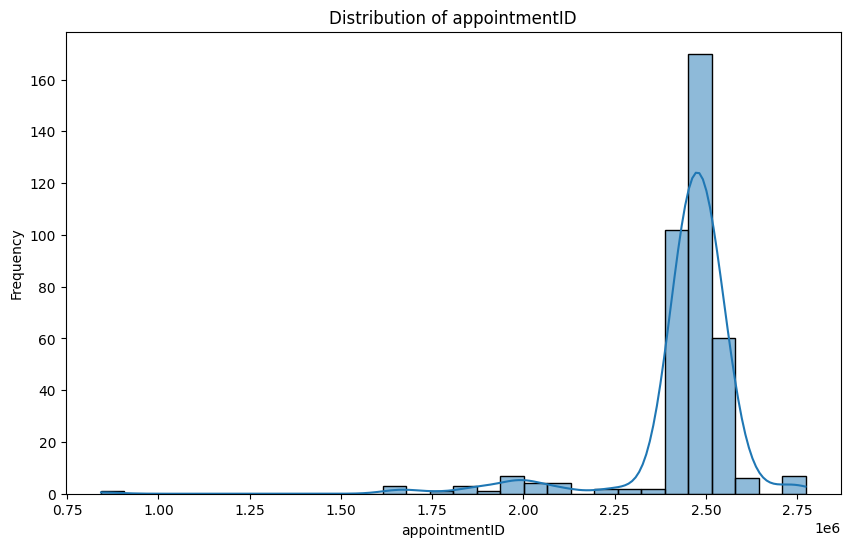

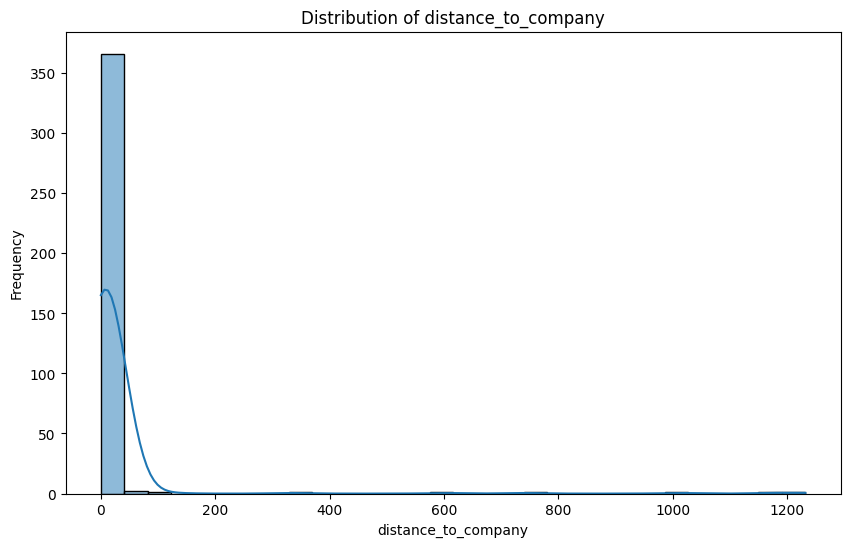

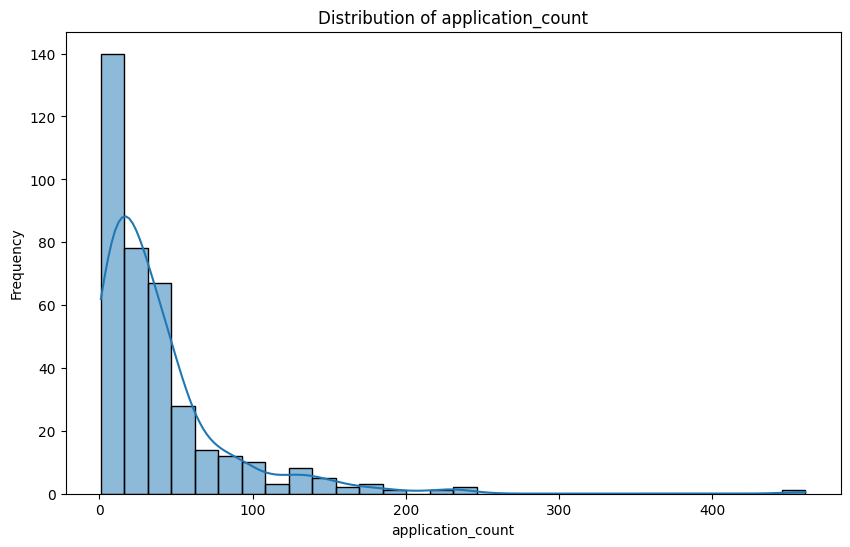

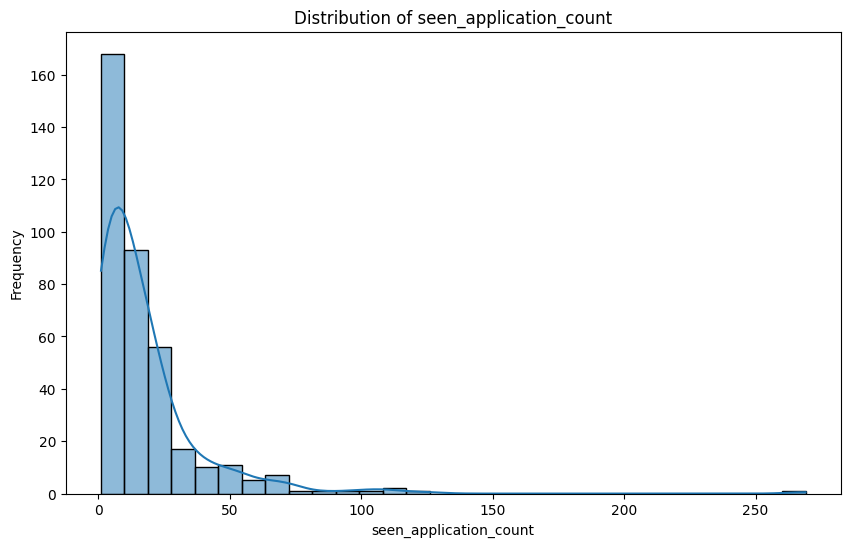

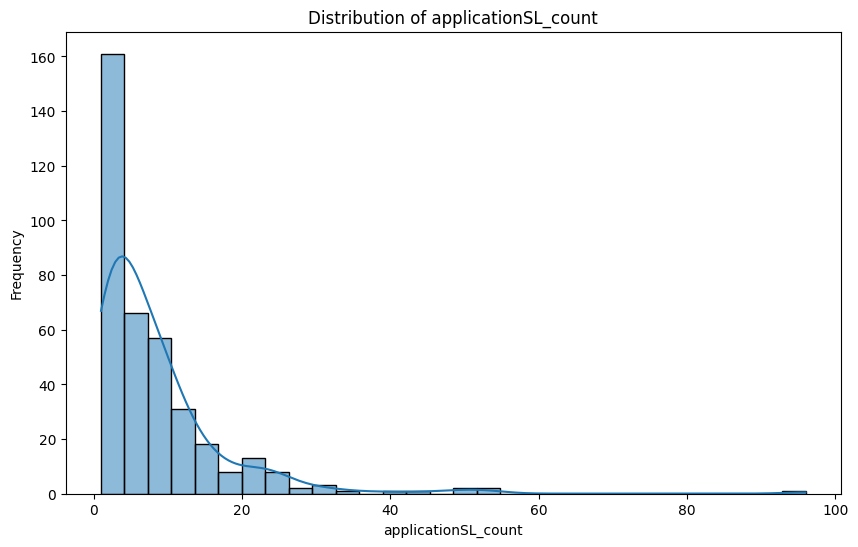

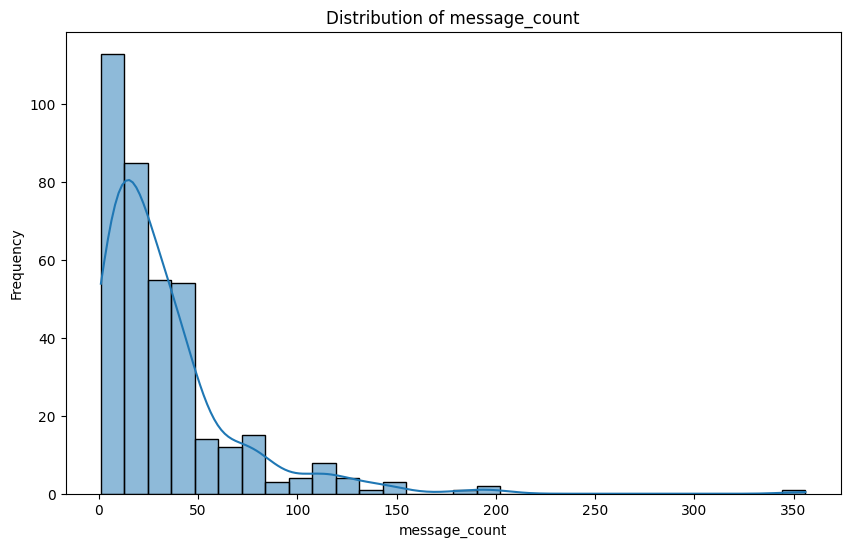

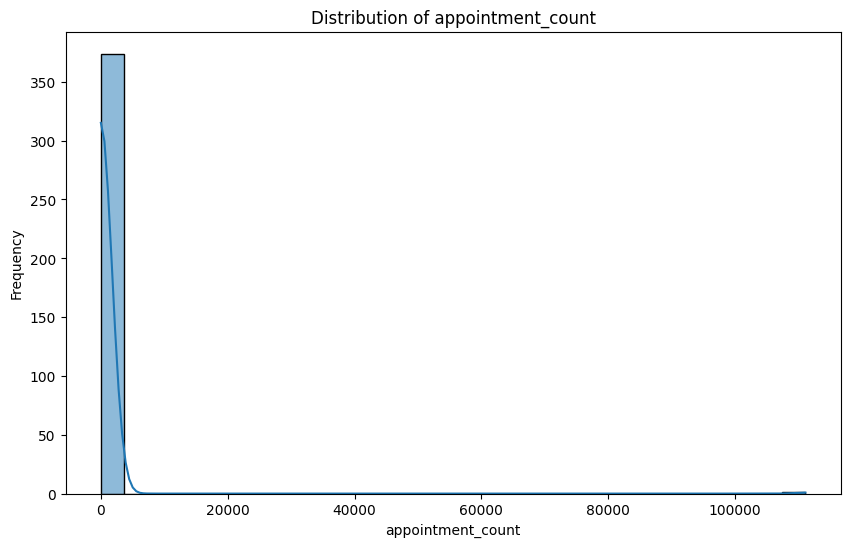

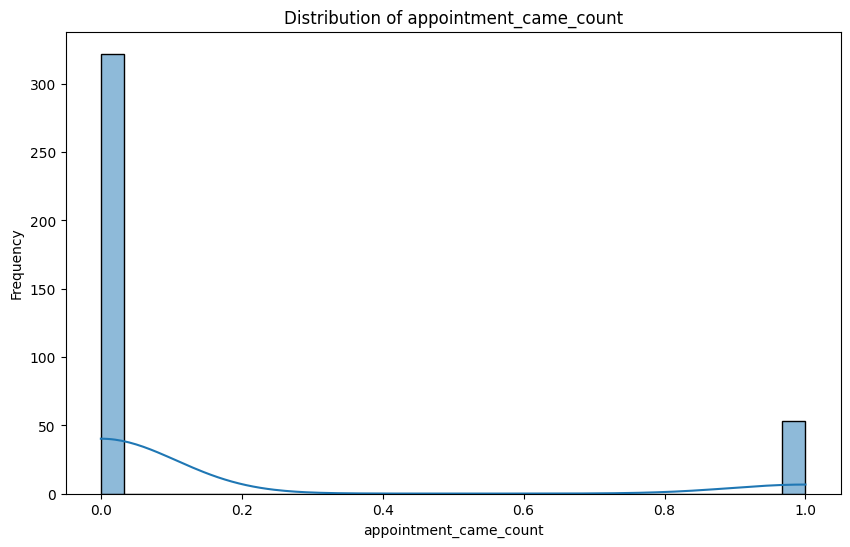

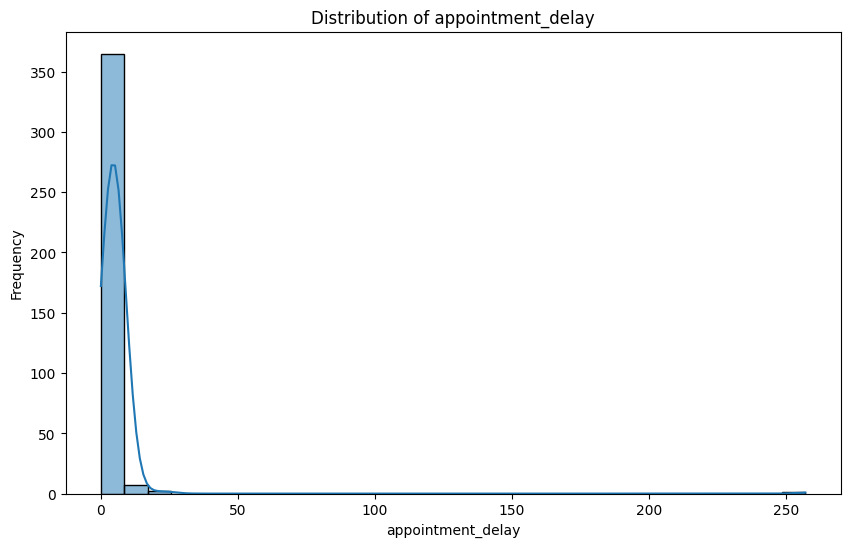

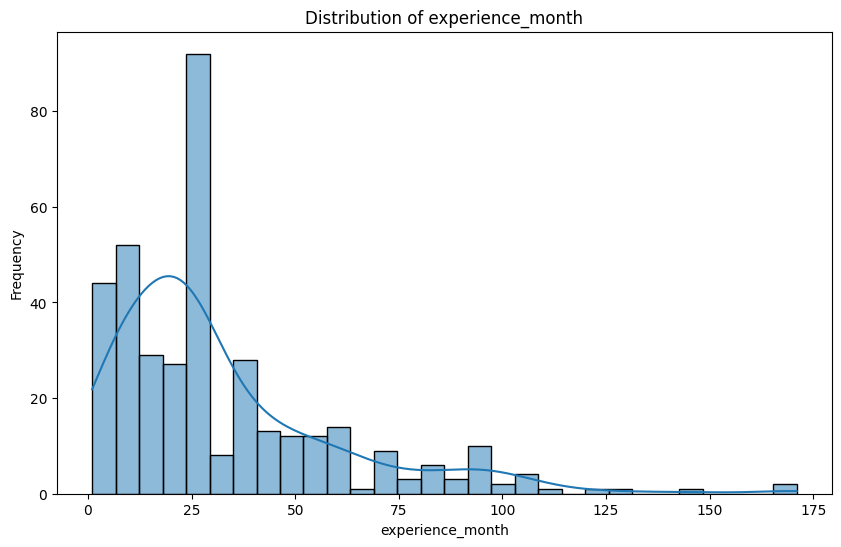

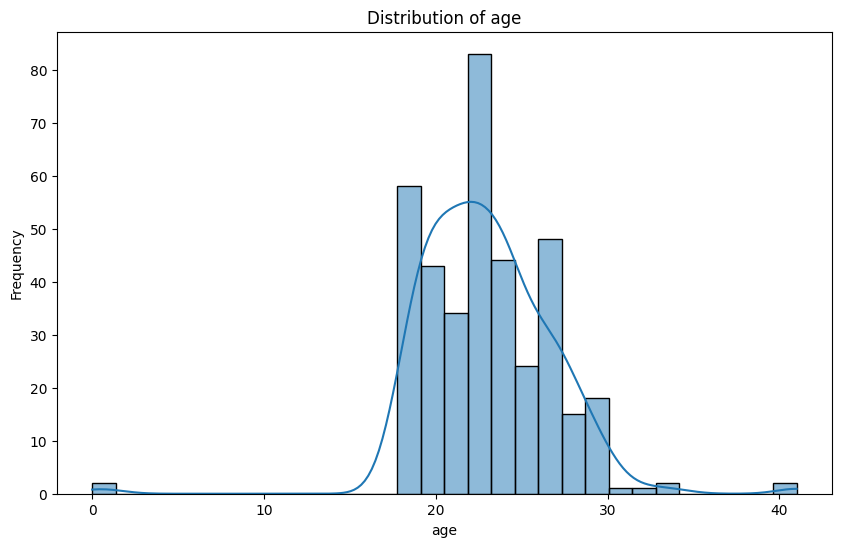

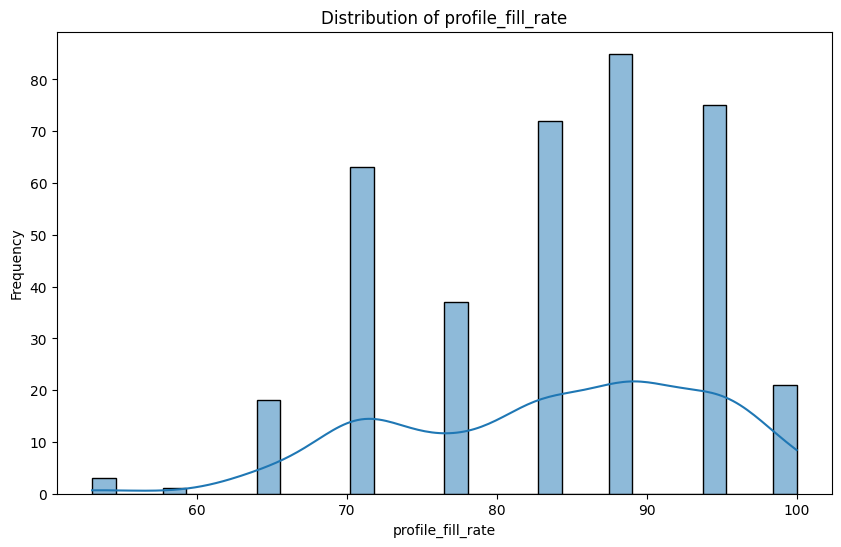

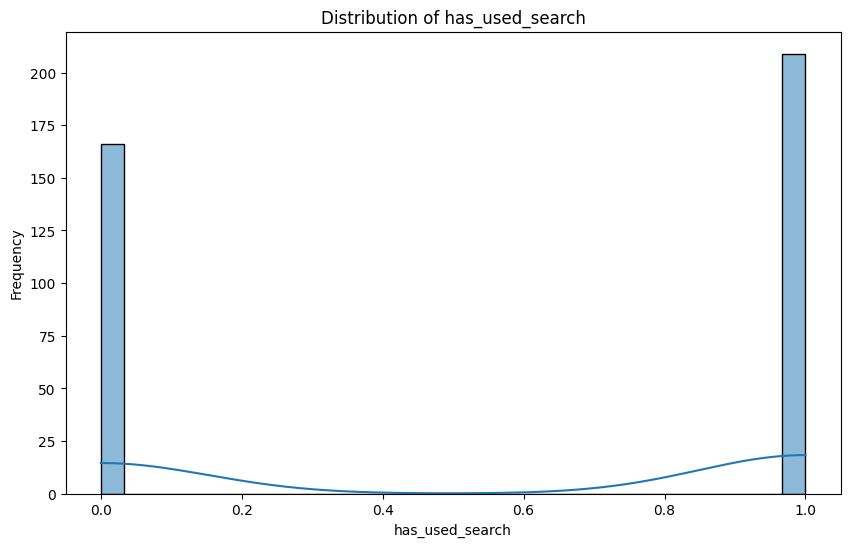

In [60]:
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

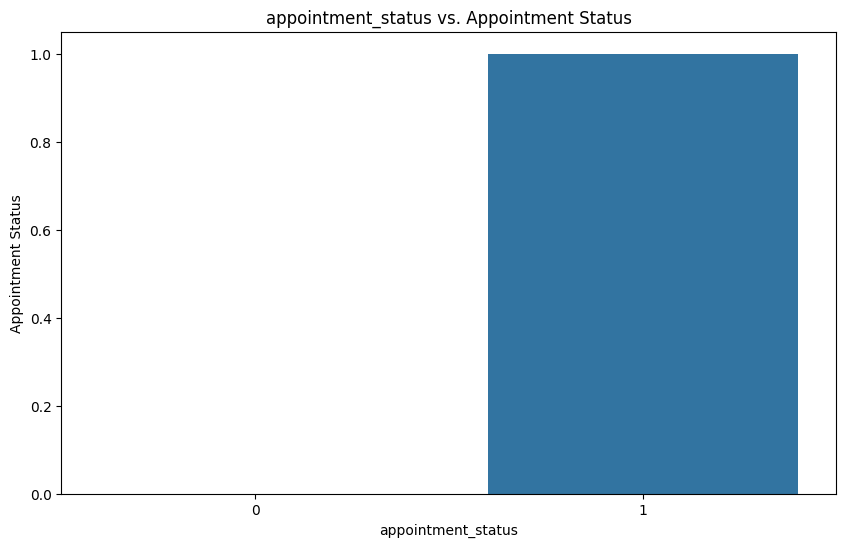

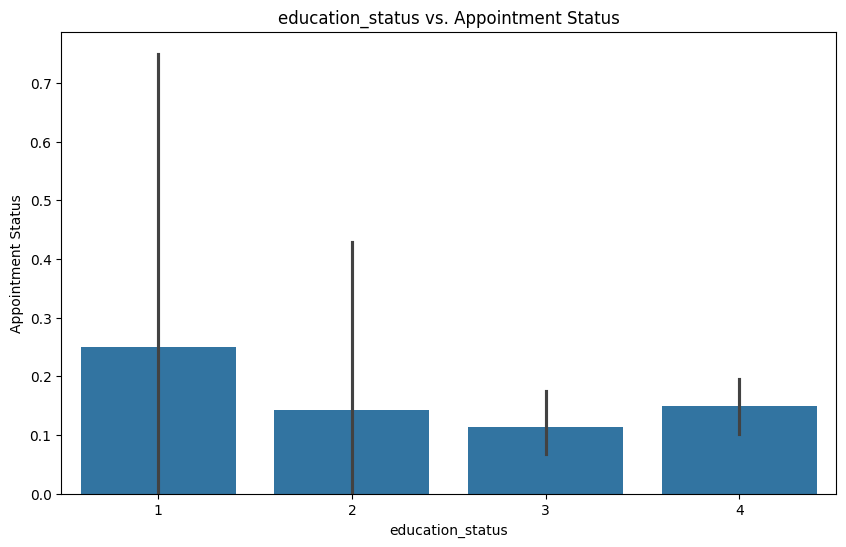

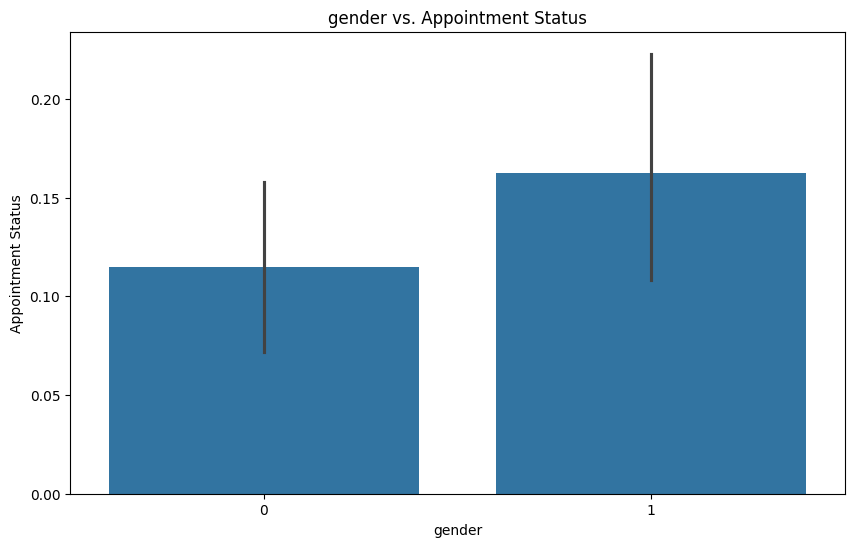

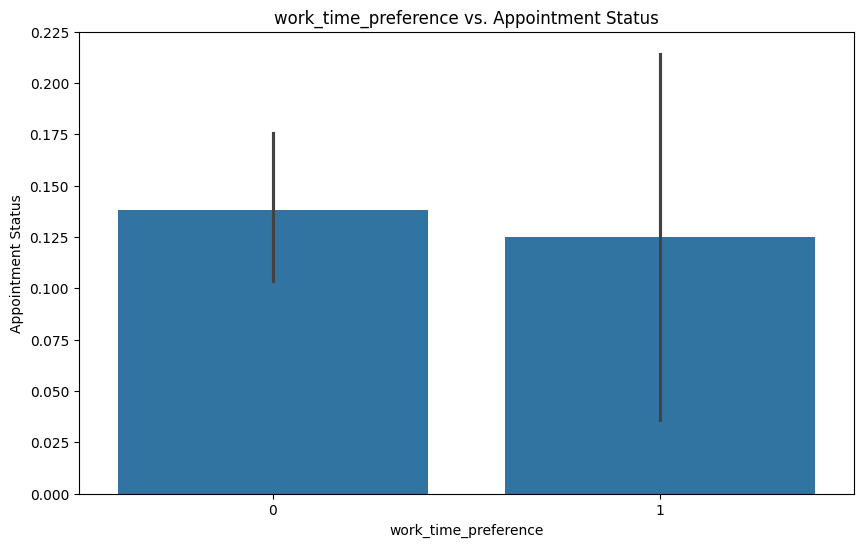

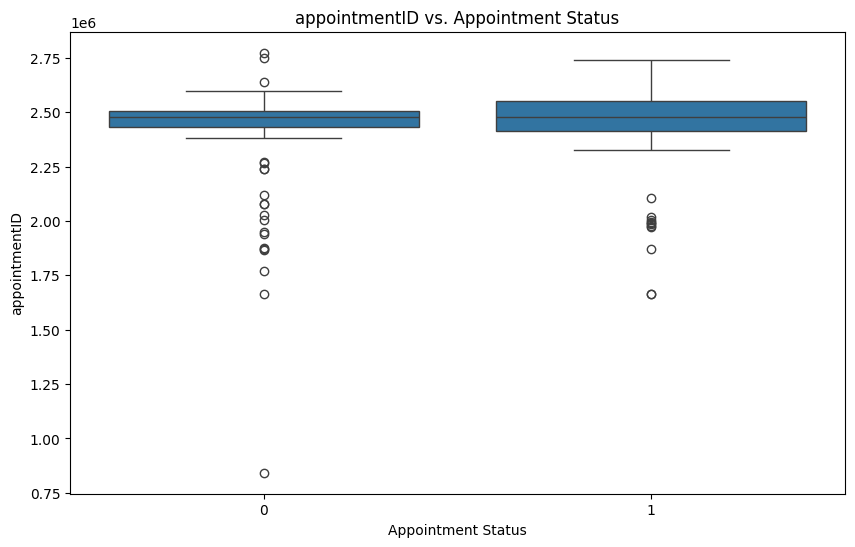

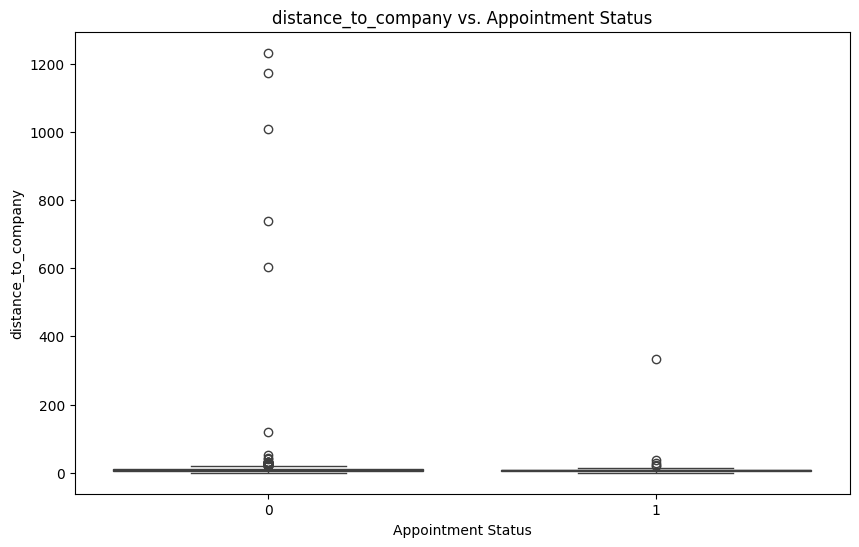

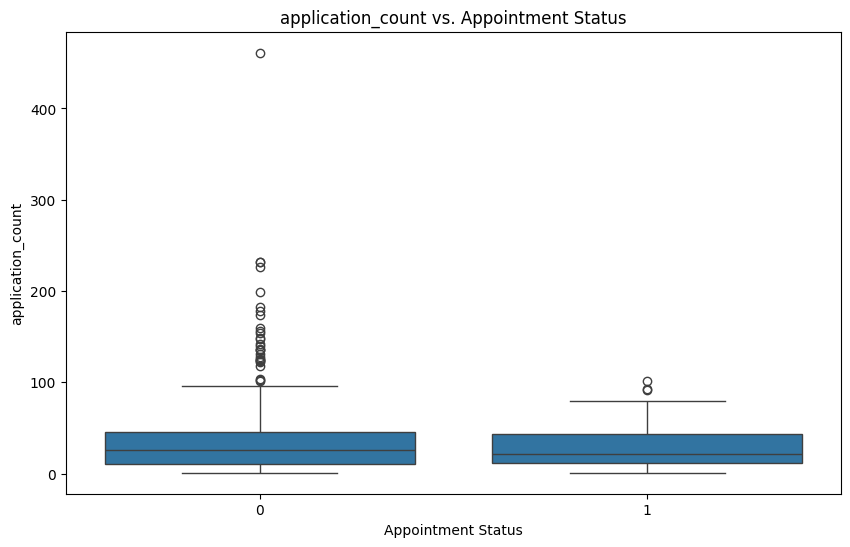

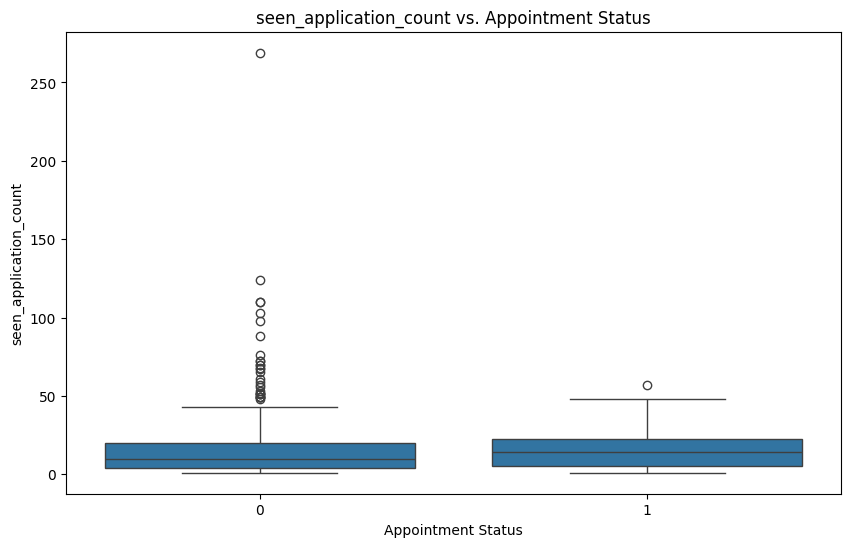

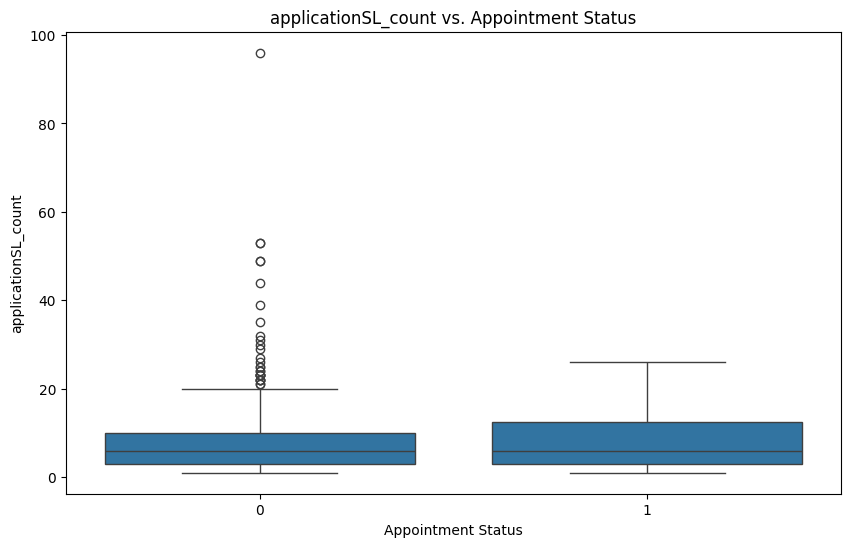

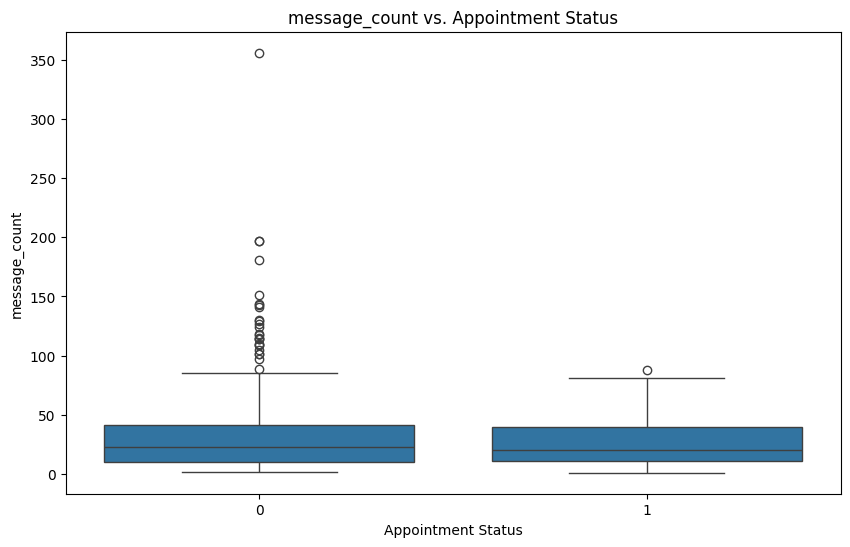

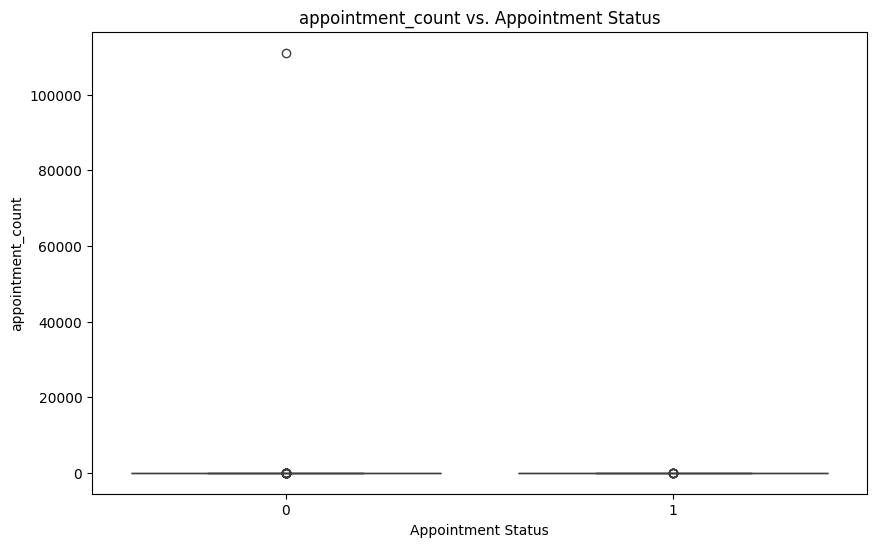

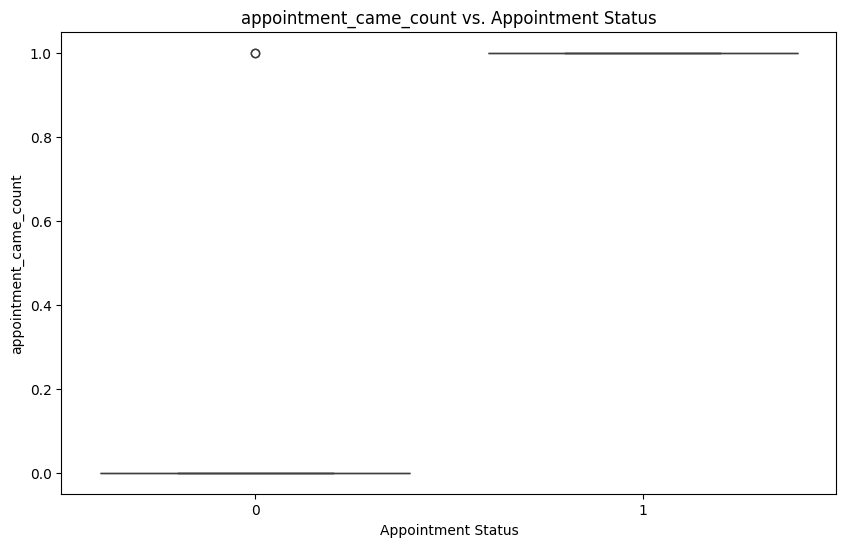

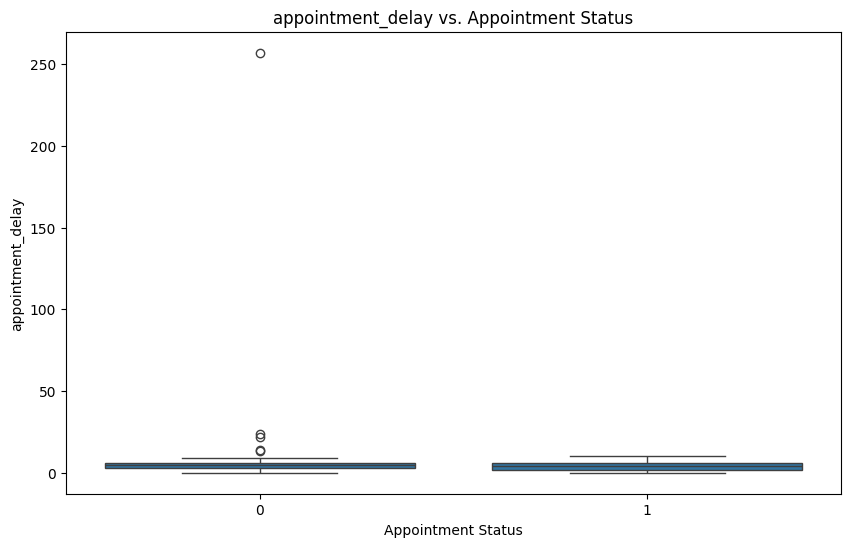

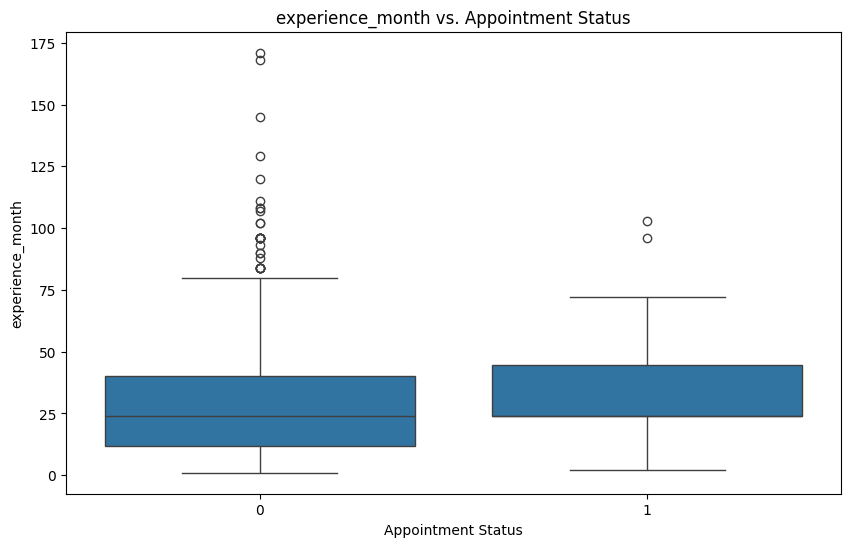

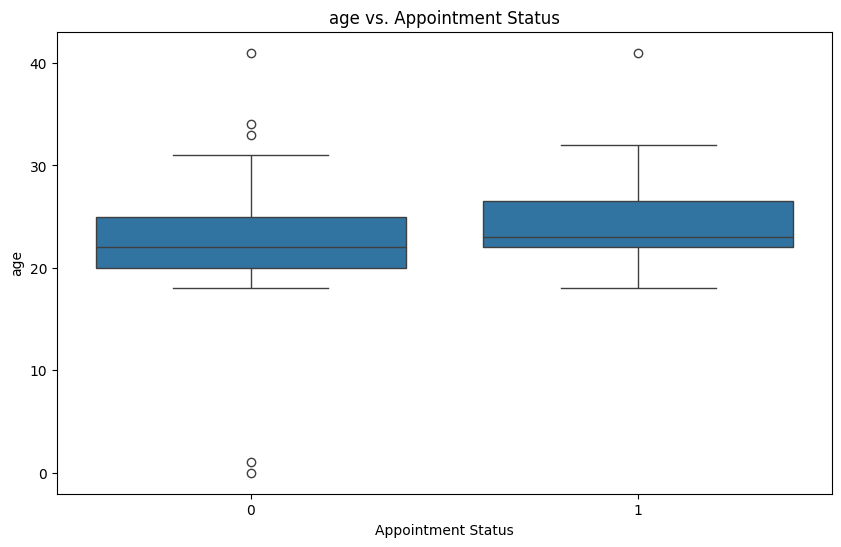

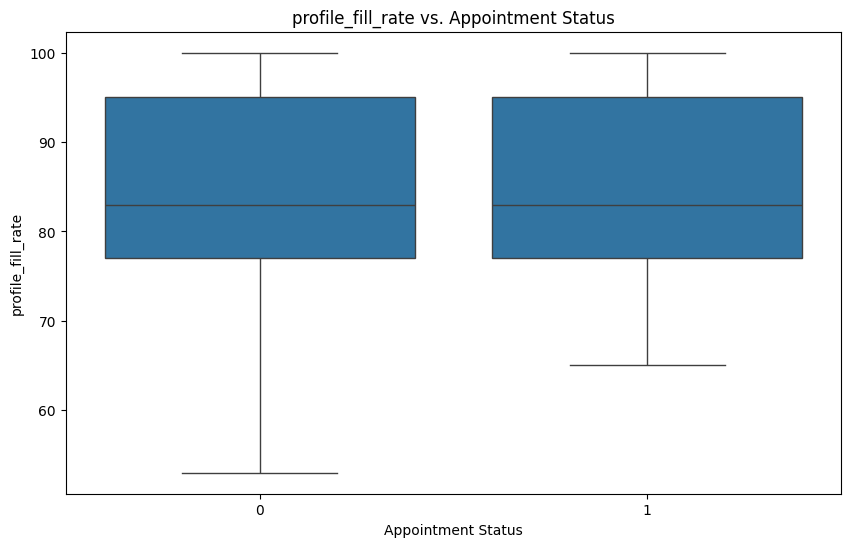

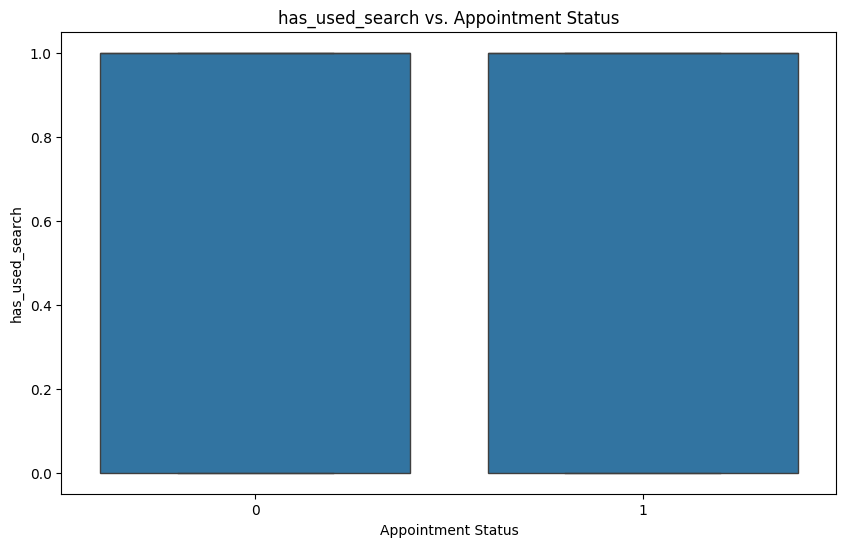

In [21]:
# Visualize the relationship between target and categorical variables
for column in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, x=column, y='appointment_status')
    plt.title(f'{column} vs. Appointment Status')
    plt.xlabel(column)
    plt.ylabel('Appointment Status')
    plt.show()

# Visualize the relationship between target and numeric variables
for column in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='appointment_status', y=column)
    plt.title(f'{column} vs. Appointment Status')
    plt.xlabel('Appointment Status')
    plt.ylabel(column)
    plt.show()



## Outlier Detection and Removal


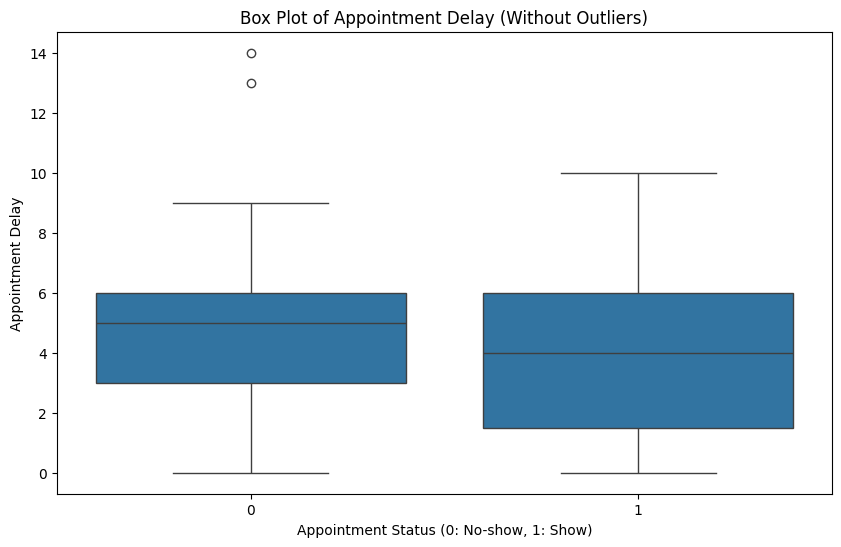

In [69]:
# Detect and remove outliers for appointment_delay using IQR method
Q1 = df['appointment_delay'].quantile(0.15)
Q3 = df['appointment_delay'].quantile(0.85)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_no_outliers = df[(df['appointment_delay'] >= lower_bound) & (df['appointment_delay'] <= upper_bound)]

# Visualize data without outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_no_outliers, y='appointment_delay', x='appointment_status')
plt.title('Box Plot of Appointment Delay (Without Outliers)')
plt.ylabel('Appointment Delay')
plt.xlabel('Appointment Status (0: No-show, 1: Show)')
plt.show()


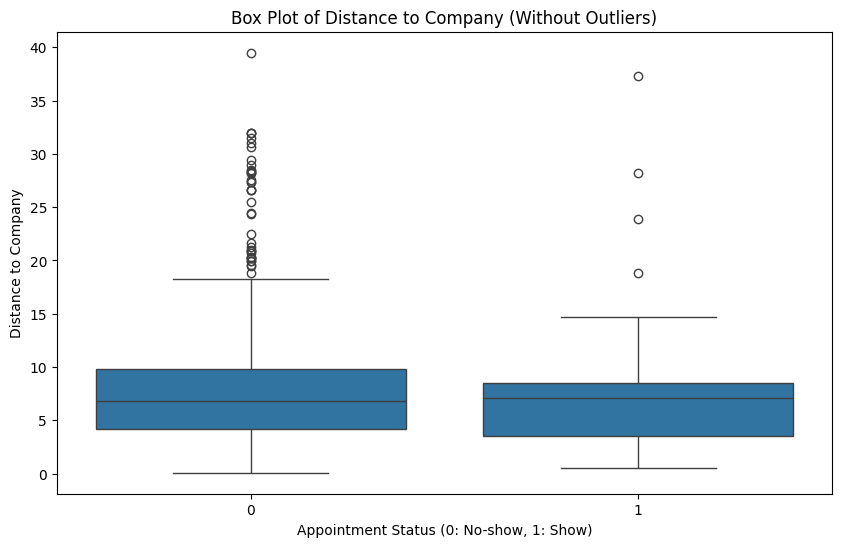

In [70]:
# Detect and remove outliers for distance_to_company using IQR method
Q1 = df['distance_to_company'].quantile(0.15)
Q3 = df['distance_to_company'].quantile(0.85)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_dtc_no_outliers = df[(df['distance_to_company'] >= lower_bound) & (df['distance_to_company'] <= upper_bound)]

# Visualize data without outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_dtc_no_outliers, y='distance_to_company', x='appointment_status')
plt.title('Box Plot of Distance to Company (Without Outliers)')
plt.ylabel('Distance to Company')
plt.xlabel('Appointment Status (0: No-show, 1: Show)')
plt.show()



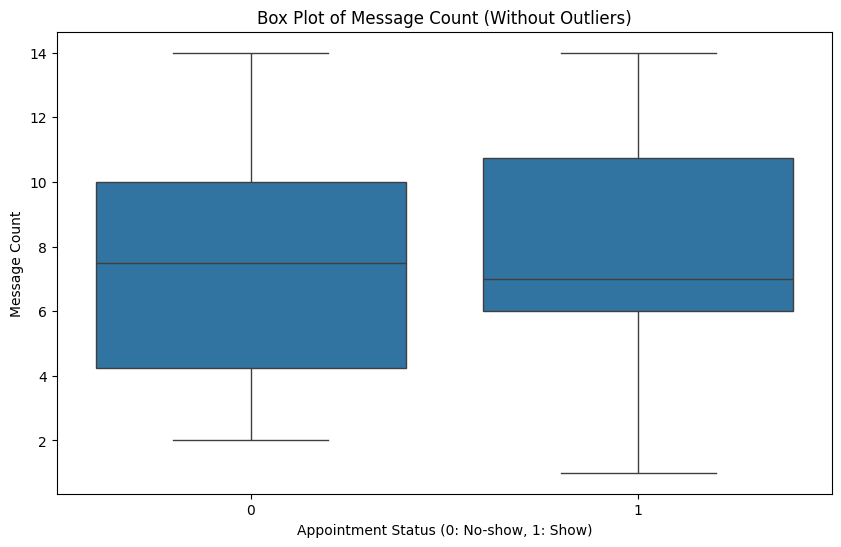

In [68]:
# Detect and remove outliers for message count using IQR method
Q1 = df['appointment_delay'].quantile(0.15)
Q3 = df['appointment_delay'].quantile(0.85)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_mc_no_outliers = df[(df['message_count'] >= lower_bound) & (df['message_count'] <= upper_bound)]

# Visualize data without outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_mc_no_outliers, y='message_count', x='appointment_status')
plt.title('Box Plot of Message Count (Without Outliers)')
plt.ylabel('Message Count')
plt.xlabel('Appointment Status (0: No-show, 1: Show)')
plt.show()



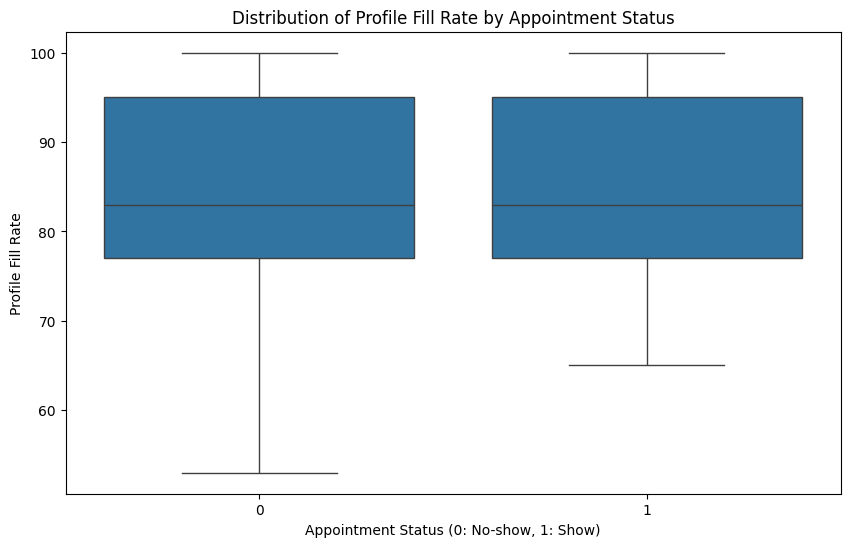

In [67]:
# Box plot: Profile Fill Rate by Appointment Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='appointment_status', y='profile_fill_rate', data=df)
plt.title('Distribution of Profile Fill Rate by Appointment Status')
plt.xlabel('Appointment Status (0: No-show, 1: Show)')
plt.ylabel('Profile Fill Rate')
plt.show()
